In [1]:
import pandas as pds
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_file(fname):
    with open(fname) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    
    return pds.DataFrame(content)

In [3]:
train = pds.concat([read_file('x_train.txt'), read_file('y_train.txt')], axis=1)
train.columns = ['x', 'label']

test = pds.concat([read_file('x_test.txt'), read_file('y_test.txt')], axis=1)
test.columns = ['x', 'label']

train['cat'] = train.label.factorize()[0]

In [17]:
cat_id = train[['label', 'cat']].drop_duplicates().sort_values('cat').reset_index(drop=True)

In [18]:
cat_id.iloc[0:60]

,label,cat
0,est,0
1,swe,1
2,mai,2
3,oci,3
4,tha,4
5,orm,5
6,lim,6
7,guj,7
8,pnb,8
9,zea,9


In [5]:
cv = CountVectorizer()

In [6]:
x_train_counts = cv.fit_transform(train.x)

In [7]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, train.label)

In [8]:
y_data = cv.transform(test.x)

In [9]:
predictions = clf.predict(y_data)

In [10]:
sum(test.label == predictions) / len(predictions) * 100

92.79574468085107

In [11]:
conf_mat = confusion_matrix(test.label, predictions)

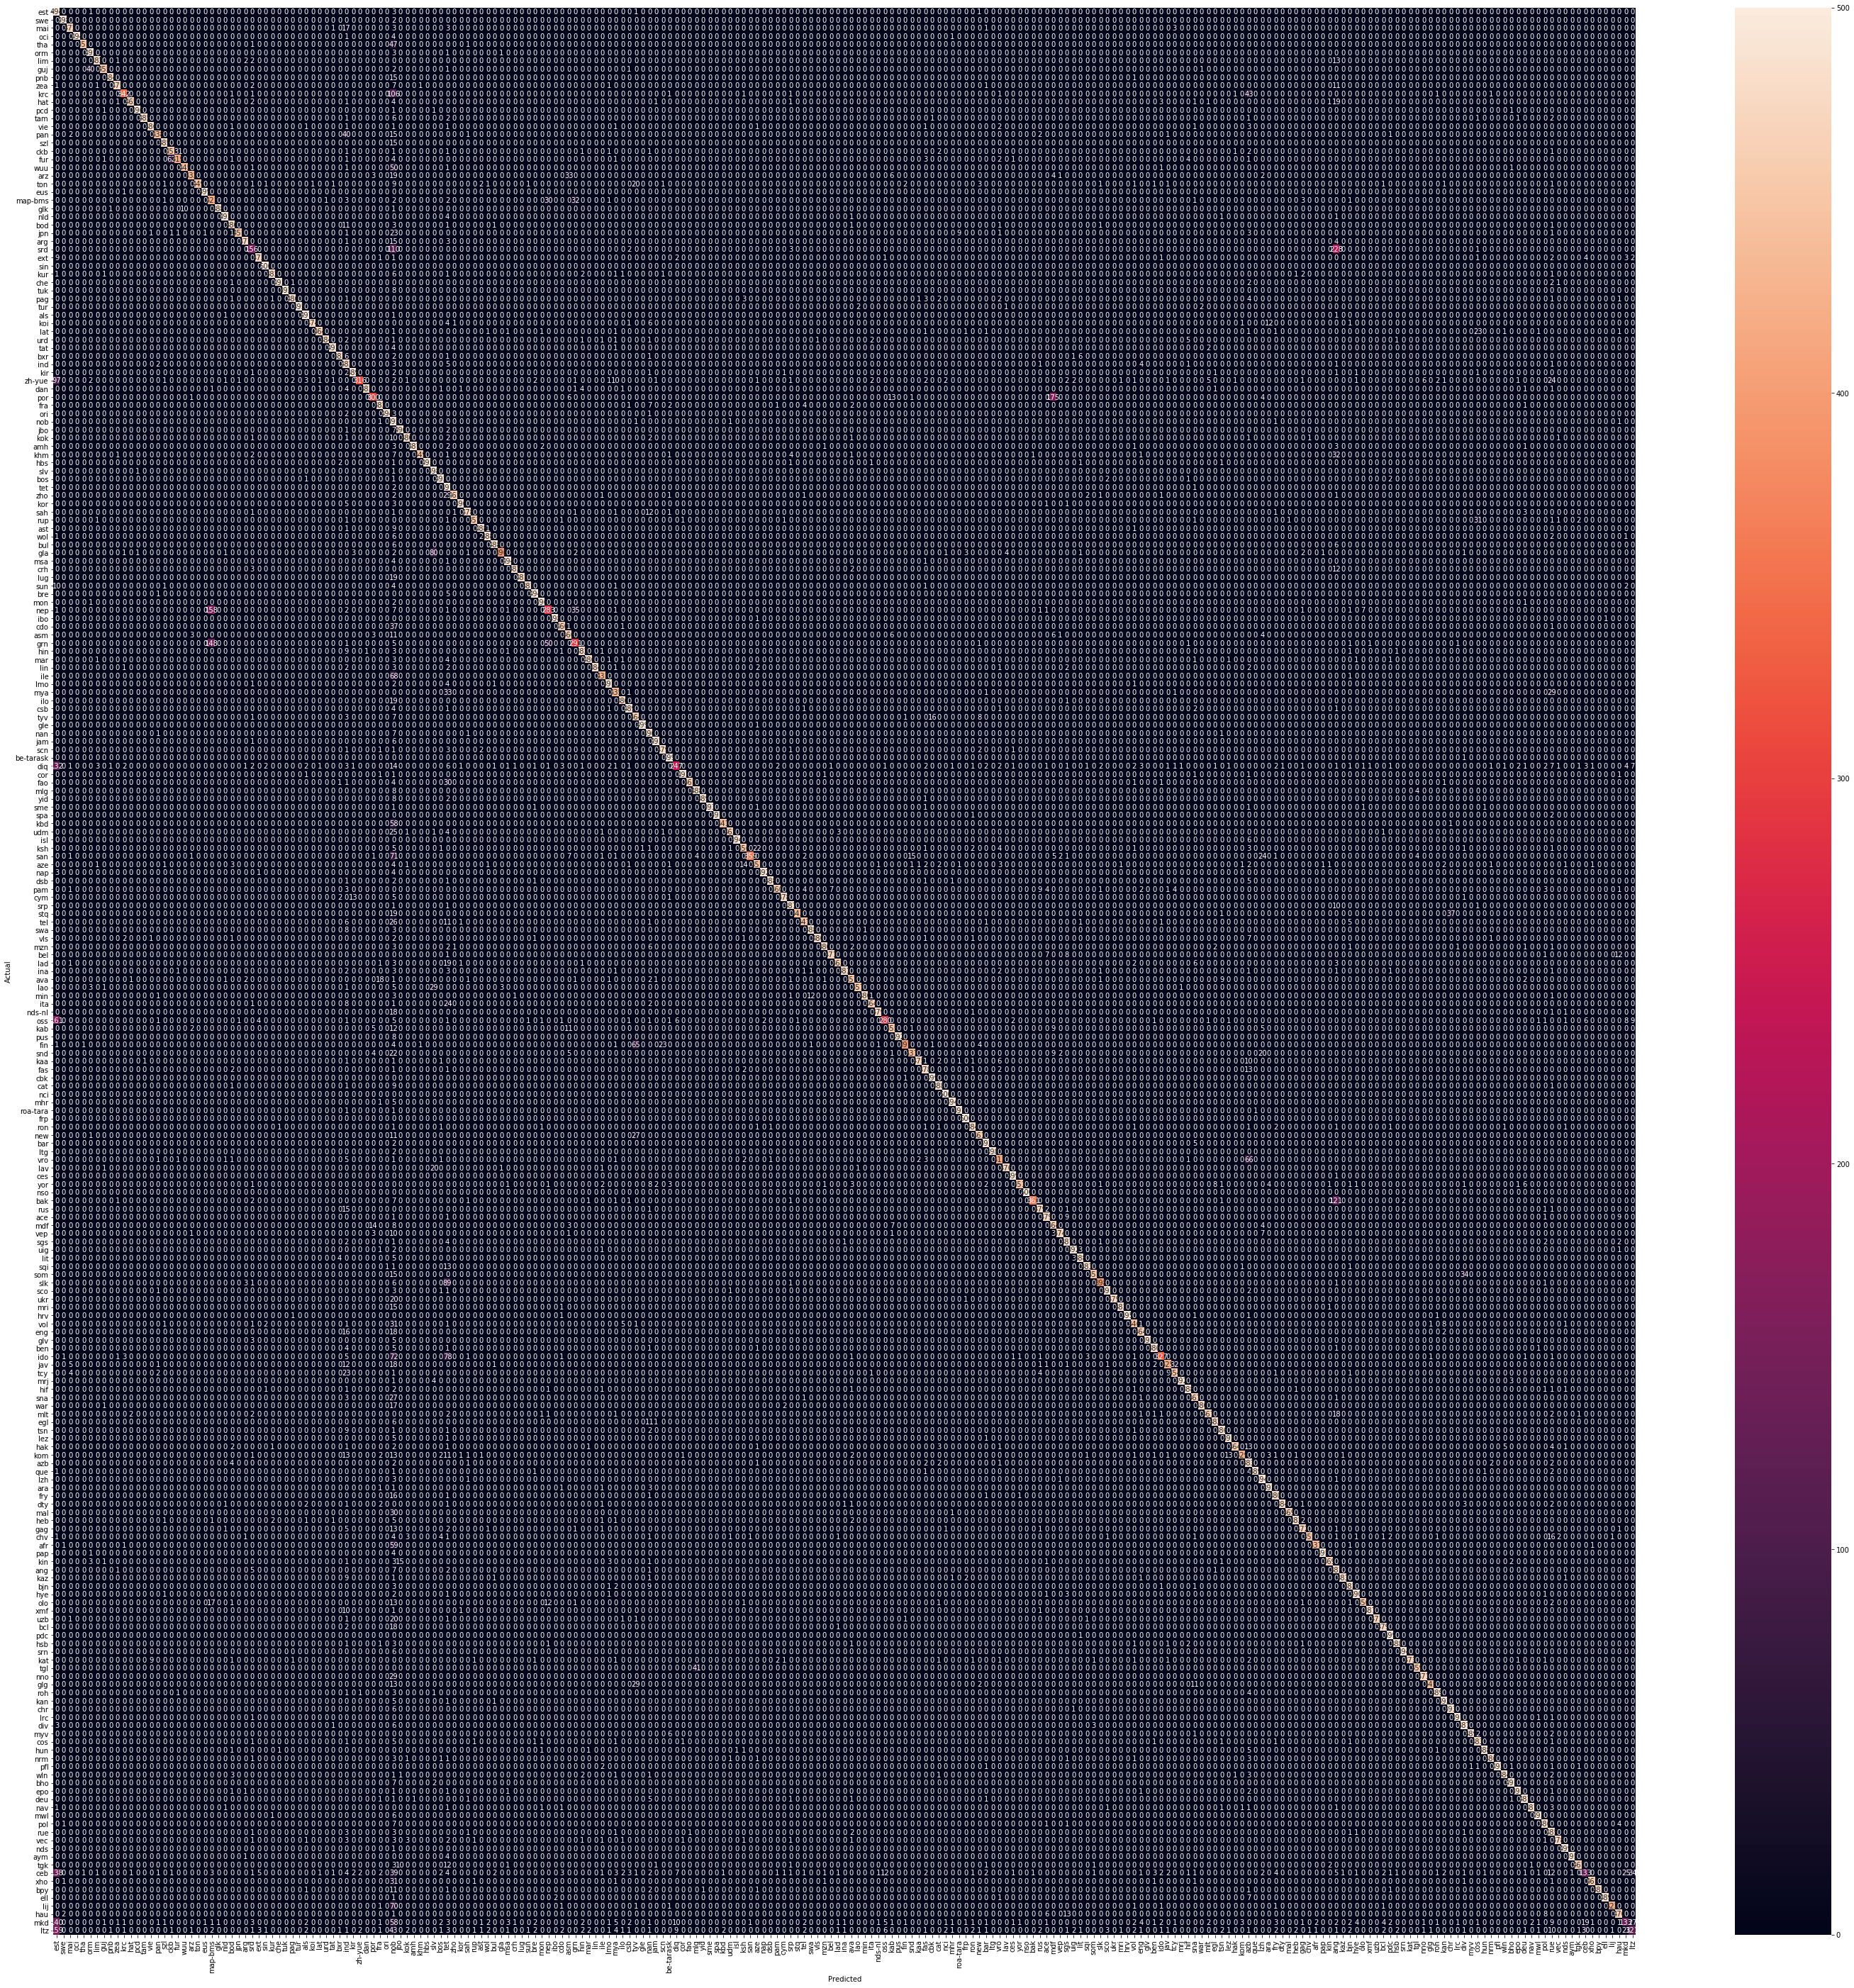

In [13]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=cat_id.label.values, yticklabels=cat_id.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
lang = pds.read_csv('labels.csv', sep=";")

In [28]:
lang[lang.Label == 'nob']

,Label,English,Wiki Code,ISO 369-3,German,Language family,Writing system,Remarks,Synonyms
152,nob,Bokmål,no,nob,Bokmål,Indo-European,Latin,Norwegian,NaN
